<a href="https://colab.research.google.com/github/minshyee/VGameDataAnalysis-Project/blob/main/game_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving df_use.csv to df_use.csv


In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from scipy import stats

In [6]:
df = pd.read_csv('df_use.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0,40
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10,180
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0,20
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0,40
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40,250
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150,40,0,10,200
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10,0,0,0,10
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440,190,30,130,790
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50,50,250,30,380


In [ ]:
count = df.groupby('Year').count()
count = count[['Name']]
count.columns =['Release']
count

In [ ]:
sale = df.groupby('Year').sum()
sale = sale[['total_sales']]
sale

In [ ]:
cands = pd.concat([count,sale],axis=1).reset_index()
cands

<Figure size 1440x576 with 0 Axes>

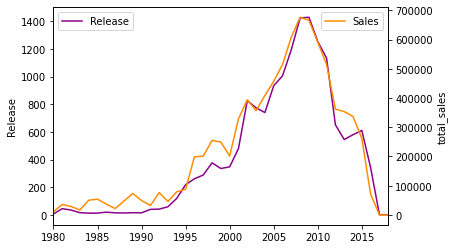

In [248]:
plt.figure(figsize=(20, 8))
fig, ax1 = plt.subplots()
ax1.set_ylabel('Release')
plt.plot(cands['Year'],cands['Release'],color='darkmagenta',label='Release')
plt.legend(loc='best')
ax2 = ax1.twinx()
ax2.set_ylabel('total_sales')
plt.plot(cands['Year'],cands['total_sales'],color='darkorange',label='Sales')
plt.xlabel('Year',size='15')
plt.xticks(fontsize='15')
plt.xlim(1980, 2018)
plt.legend(loc=1)
plt.show()

# 지역에 따라 선호하는 게임장르가 다를까


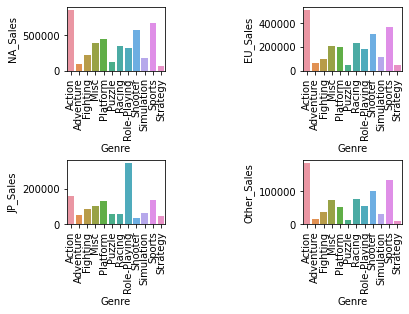

In [7]:
g_byloc = df.loc[:,['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
g_byloc = g_byloc.groupby(df['Genre']).sum().reset_index()
g_byloc

plt.subplot(3,3,1)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['NA_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,3)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['EU_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,7)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['JP_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,9)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['Other_Sales'])
# plt.title("지역 별, 장르 수입액")
plt.xticks(rotation =90)
plt.show()

In [8]:
ch = g_byloc.sort_values('NA_Sales',ascending=False)[:3]
ch = ch[['Genre','NA_Sales']]
ch1 = g_byloc.sort_values('EU_Sales',ascending=False)[:3]
ch1 = ch1[['Genre','EU_Sales']]
ch2 = g_byloc.sort_values('JP_Sales',ascending=False)[:3]
ch2 = ch2[['Genre','JP_Sales']]
ch3 = g_byloc.sort_values('Other_Sales',ascending=False)[:3]
ch3 = ch3[['Genre','Other_Sales']]
chart = pd.concat([ch,ch1,ch2,ch3],ignore_index=True)
chart = pd.melt(chart, id_vars=['Genre']).dropna()
chart

,Genre,variable,value
0,Action,NA_Sales,858748.0
1,Sports,NA_Sales,667258.0
2,Shooter,NA_Sales,574479.0
15,Action,EU_Sales,513638.0
16,Sports,EU_Sales,370969.0
17,Shooter,EU_Sales,310229.0
30,Role-Playing,JP_Sales,342930.0
31,Action,JP_Sales,156600.0
32,Sports,JP_Sales,134760.0
45,Action,Other_Sales,183989.0


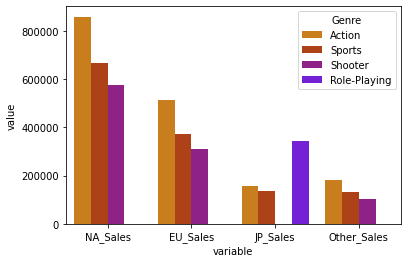

In [9]:
sns.barplot(data=chart,x='variable', y='value', hue='Genre',palette='gnuplot_r')

## 정리
대부분의 나라에서 Action장르가 가장 많은 출고량을 보였으나
일본의 경우 Role-playing 장르가 압도적으로 높은것을 발견하였다.

최대 출고량을 비교했을때 미국과 유럽의 출고량이 일본을 포함한 다른 나라들의 출고량이 2배 이상 높은 수치를 보이고 있음을 알고 있따.

- 그래프 예쁘게 만들기
- 출고량 단위를 변경?


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

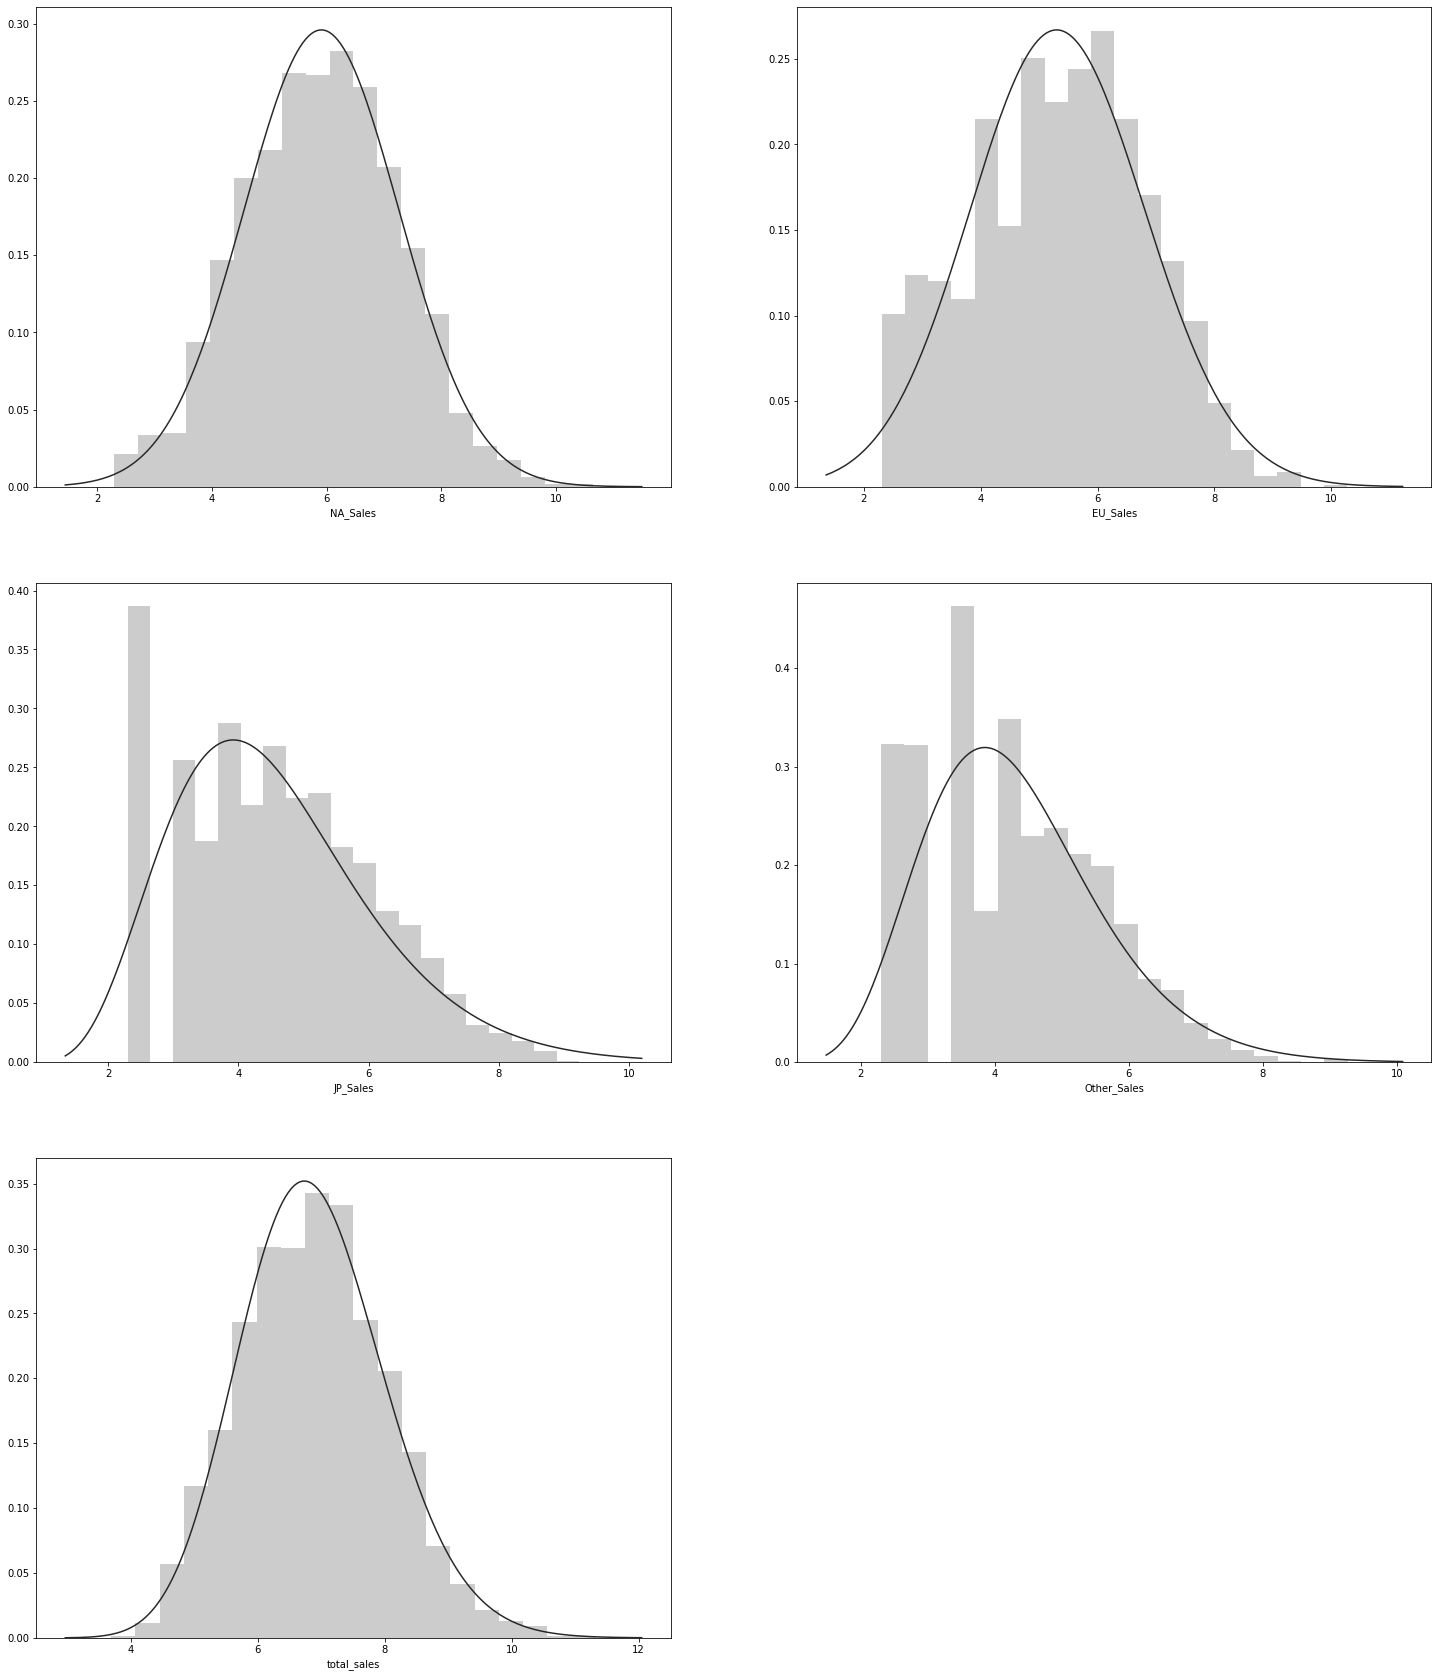

In [286]:
data_reg1 = df.copy()

data_reg1 = data_reg1[data_reg1.NA_Sales != 0]
data_reg1 = data_reg1[data_reg1.EU_Sales != 0]
data_reg1 = data_reg1[data_reg1.Other_Sales != 0]
data_reg1 = data_reg1[data_reg1.JP_Sales != 0]
data_reg1 = data_reg1[data_reg1.total_sales != 0]

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'total_sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_reg1[column]), bins=20, kde=False, fit=stats.gamma,color='gray');

# 연도별 게임의 트렌드가 있을까?


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

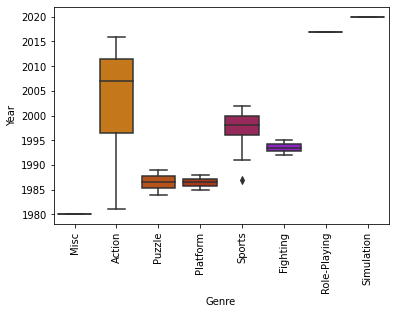

In [263]:
#연도별 게임의 인기출시장르
gcount_by_year = df['Genre'].groupby(df['Year']).value_counts()
gcount_by_year = pd.DataFrame(gcount_by_year)

prev=gcount_by_year.index[0][0]
f_games = [gcount_by_year.index[0]]

for i in range(len(gcount_by_year)):
  if gcount_by_year.index[i][0] != prev:
    prev = gcount_by_year.index[i][0]
    f_games.append(gcount_by_year.index[i])
  else:
    continue

f_games = pd.DataFrame(f_games, columns=['Year','Genre'])

sns.boxplot(y = f_games['Year'], x = f_games['Genre'],palette='gnuplot_r') #box , strip, violin  중 하나로
plt.xticks(rotation =90)


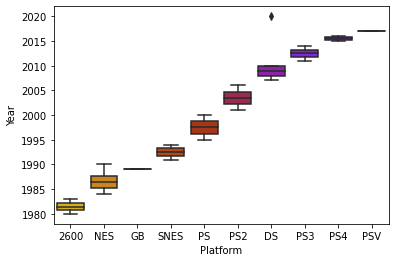

In [274]:
#연도별 게임의 인기출시플랫폼
pcount_by_year = df['Platform'].groupby(df['Year']).value_counts()
pcount_by_year = pd.DataFrame(pcount_by_year)

prev=pcount_by_year.index[0][0]
f_games = [pcount_by_year.index[0]]

for i in range(len(pcount_by_year)):
  if pcount_by_year.index[i][0] != prev:
    prev = pcount_by_year.index[i][0]
    f_games.append(pcount_by_year.index[i])
  else:
    continue

f_games = pd.DataFrame(f_games, columns=['Year','Platform'])

sns.boxplot(y = f_games['Year'], x = f_games['Platform'],palette='gnuplot_r') #box , strip, violin  중 하나로
# plt.xticks(rotation =90)

In [269]:
pcount_by_year

Platform
Year Platform          
1980 2600             8
1981 2600            46
1982 2600            36
1983 2600            11
     NES              6
...                 ...
2016 WiiU            10
     X360             8
2017 PSV              2
     PS4              1
2020 DS               1

[241 rows x 1 columns]

In [ ]:
pcount_by_year.tail(50),gcount_by_year.head(40)

In [57]:
dfs = df[['NA_Sales','total_sales','EU_Sales','JP_Sales','Other_Sales']]

# 출고량이 높은 게임에 대한 분석 및 시각화

In [13]:
df_sales = df.sort_values('total_sales',ascending=False).reset_index(drop=True)

In [275]:
df_sales_top10 = df_sales[:1624]
df_sales_top10.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41490,29020,3770,8460,82740
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080,3580,6810,770,40240
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850,12880,3790,3310,35830
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750,11010,3280,2960,33000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270,8890,10220,1000,31380
5,Tetris,GB,1989,Puzzle,Nintendo,23200,2260,4220,580,30260
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380,9230,6500,2900,30010
7,Wii Play,Wii,2006,Misc,Nintendo,14030,9200,2930,2850,29010
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590,7060,4700,2260,28610
9,Duck Hunt,NES,1984,Shooter,Nintendo,26930,630,280,470,28310


In [253]:
df_top10_a = df_sales_top10.sort_values(['total_sales'],ascending=False).head(15)
df_top10_a = df_top10_a[['Name','total_sales']]
# df_top10_a = df_top10_a.groupby('Name').sum().head(10)
df_top10_a = df_top10_a.sort_values('total_sales', ascending=False).reset_index(drop=True)
df_top10_a

,Name,total_sales
0,Wii Sports,82740
1,Super Mario Bros.,40240
2,Mario Kart Wii,35830
3,Wii Sports Resort,33000
4,Pokemon Red/Pokemon Blue,31380
5,Tetris,30260
6,New Super Mario Bros.,30010
7,Wii Play,29010
8,New Super Mario Bros. Wii,28610
9,Duck Hunt,28310


Text(0, 0.5, 'Name')

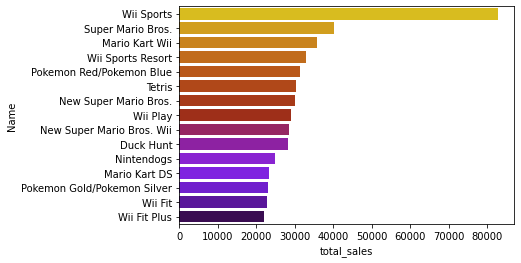

In [256]:
sns.barplot(data=df_top10_a,x="total_sales",y="Name",palette='gnuplot_r')
# plt.xticks(rotation =90)
plt.xlabel('total_sales')
plt.ylabel('Name')

In [ ]:
year = pd.DataFrame(df_sales_top10['Year'].value_counts()).reset_index()
year

Text(0, 0.5, 'Count')

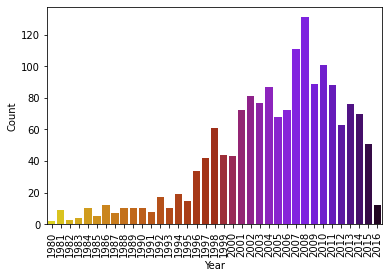

In [16]:
#출고량 상위 10% 게임이 출시된 연도
sns.barplot(data=year,x="index",y="Year",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Year')
plt.ylabel('Count')

In [17]:
genre = pd.DataFrame(df_sales_top10['Genre'].value_counts()).reset_index()
genre

,index,Genre
0,Action,329
1,Sports,232
2,Shooter,203
3,Role-Playing,171
4,Platform,155
5,Misc,134
6,Racing,134
7,Fighting,98
8,Simulation,70
9,Puzzle,44


Text(0, 0.5, 'Count')

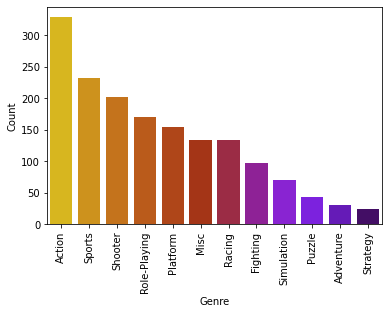

In [18]:
#출고량 상위 10% 게임의 장르
sns.barplot(data=genre,x="index",y="Genre",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Genre')
plt.ylabel('Count')

In [ ]:
#출고량 상위 10%의 게임 platform
platform = pd.DataFrame(df_sales_top10['Platform'].value_counts()).reset_index()
platform

Text(0, 0.5, 'Count')

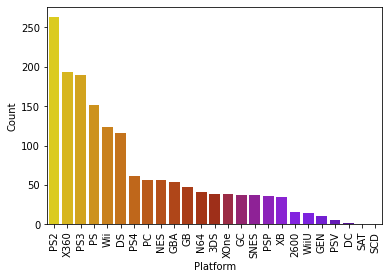

In [20]:
sns.barplot(data=platform,x="index",y="Platform",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Platform')
plt.ylabel('Count')

# 최근 경향 파악하기
(5년간의 경향)


In [21]:
df_sales_new = df.sort_values('Year',ascending=False).reset_index(drop=True)
df_sales_new = df_sales_new[:956]
df_sales_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,270,0,0,20,290
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,30,0,30
2,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,10,0,10
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10,0,10
4,Hatsune Miku: Project Diva X,PS4,2016,Misc,Sega,10,0,20,0,30
...,...,...,...,...,...,...,...,...,...,...
951,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015,Action,Unknown,0,10,0,0,10
952,Dragon Ball: XenoVerse,PS4,2015,Fighting,Namco Bandai Games,300,480,120,150,1050
953,Thomas and Friends: Steaming around Sodor,3DS,2015,Action,Avanquest Software,0,20,0,0,20
954,Rugby League Team Manager 2015,PC,2015,Action,Alternative Software,0,20,0,0,20


In [22]:
df_sales_new = df_sales_new.sort_values('total_sales',ascending=False)
df_sales_new.reset_index(inplace=True,drop=True)
df_sales_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770,5810,350,2310,14240
1,FIFA 16,PS4,2015,Sports,Electronic Arts,1110,6060,60,1260,8490
2,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2930,3290,220,1230,7670
3,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4520,2090,10,670,7290
4,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470,3150,240,1100,6960
...,...,...,...,...,...,...,...,...,...,...
951,Shitsuji ga Aruji o Erabu Toki,PSV,2016,Adventure,Unknown,0,0,10,0,10
952,Rugby League Live 3,XOne,2015,Action,Tru Blu Entertainment,0,10,0,0,10
953,MotoGP 15,X360,2015,Racing,Milestone S.r.l.,0,10,0,0,10
954,Teslagrad,PSV,2015,Platform,Rain Games,0,10,0,0,10


In [23]:
genre_s = pd.DataFrame(df_sales_new['Genre'].value_counts()).reset_index()
genre_s

,index,Genre
0,Action,372
1,Role-Playing,120
2,Sports,100
3,Adventure,86
4,Shooter,65
5,Misc,57
6,Racing,39
7,Fighting,35
8,Strategy,27
9,Simulation,25


Text(0, 0.5, 'Count')

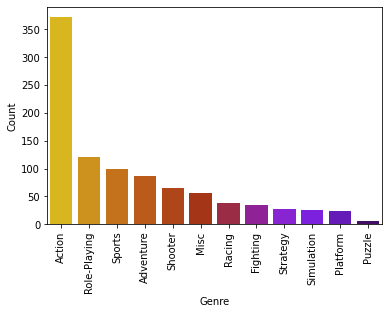

In [24]:
#최근 5년간 출시된 게임의 장르
sns.barplot(data=genre_s,x="index",y="Genre",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Genre')
plt.ylabel('Count')

In [25]:
paltform_s = pd.DataFrame(df_sales_new['Platform'].value_counts()).reset_index()
paltform_s

,index,Platform
0,PS4,244
1,PSV,173
2,XOne,131
3,3DS,121
4,PS3,105
5,PC,88
6,X360,48
7,WiiU,38
8,Wii,4
9,PSP,3


Text(0, 0.5, 'Count')

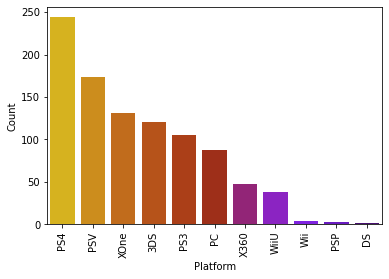

In [26]:
#최근 5년간 출시된 게임의 플랫폼
sns.barplot(data=paltform_s,x="index",y="Platform",palette='gnuplot_r')
plt.xticks(rotation =90)
plt.xlabel('Platform')
plt.ylabel('Count')

In [27]:
#최근 5년간 출고량이 1M이상인 게임들
mask = (df_sales_new['total_sales'] > 1000)
df_sales_new_filter = df_sales_new.loc[mask, : ]
df_sales_new_filter

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770,5810,350,2310,14240
1,FIFA 16,PS4,2015,Sports,Electronic Arts,1110,6060,60,1260,8490
2,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2930,3290,220,1230,7670
3,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4520,2090,10,670,7290
4,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470,3150,240,1100,6960
...,...,...,...,...,...,...,...,...,...,...
70,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,520,330,170,80,1100
71,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360,640,0,80,1080
72,Naruto Shippuden: Ultimate Ninja Storm 4,PS4,2016,Fighting,Namco Bandai Games,390,410,100,160,1060
73,Dragon Ball: XenoVerse,PS4,2015,Fighting,Namco Bandai Games,300,480,120,150,1050


## 데이터 정리하기
- 닌텐도계열 : DS, Wii, GBA, 3DS, WiiU, GB, NES, N64
- PS계열 : PSP, PS3, PS, PS4, PS2, PSV
- XBOX계열 : XB, X360, XOne

In [28]:
df_sales_new_filter['Platform'].value_counts()

PS4     37
XOne    19
3DS      8
WiiU     4
PS3      2
PC       2
X360     2
Wii      1
Name: Platform, dtype: int64

In [32]:
l = len(df_sales_new_filter['Platform'])
df_sales_new_filter['Platform'][0].startswith('PS')

True

In [ ]:
new_platform = []

for i in range(l):
  if df_sales_new_filter['Platform'][i].startswith('PS'):
    new_platform.append('PS')
  elif df_sales_new_filter['Platform'][i].startswith('X'):
    new_platform.append('XBOX')
  elif df_sales_new_filter['Platform'][i].startswith('PC'):
    new_platform.append('PC')
  else:
    new_platform.append('Nintendo')
new_platform

In [289]:
df_sales_new_filter['new_platform'] = new_platform
df_sales_new_filter.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,new_platform
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770,5810,350,2310,14240,PS
1,FIFA 16,PS4,2015,Sports,Electronic Arts,1110,6060,60,1260,8490,PS
2,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2930,3290,220,1230,7670,PS
3,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4520,2090,10,670,7290,XBOX
4,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470,3150,240,1100,6960,PS
5,FIFA 17,PS4,2016,Sports,Electronic Arts,280,3750,60,690,4780,PS
6,Splatoon,WiiU,2015,Shooter,Nintendo,1550,1150,1440,430,4570,Nintendo
7,Uncharted: The Nathan Drake Collection,PS4,2015,Action,Sony Computer Entertainment,1960,1690,80,740,4470,PS
8,Halo 5: Guardians,XOne,2015,Shooter,Microsoft Game Studios,2640,1200,30,390,4260,XBOX
9,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1300,2070,180,650,4200,PS


In [156]:
#전체 top 10
df_top10 = df_sales_new_filter.sort_values(['total_sales'],ascending=False).head(15)
df_top10 = df_top10[['Name','total_sales']]
df_top10 = df_top10.groupby('Name').sum().head(10)
df_top10 = df_top10.sort_values('total_sales', ascending=False).reset_index()
df_top10

,Name,total_sales
0,Call of Duty: Black Ops 3,21530
1,Fallout 4,11050
2,FIFA 16,8490
3,Star Wars Battlefront (2015),7670
4,FIFA 17,4780
5,Splatoon,4570
6,Halo 5: Guardians,4260
7,NBA 2K16,3850
8,Batman: Arkham Knight,3780
9,The Witcher 3: Wild Hunt,3730


Text(0, 0.5, 'Name')

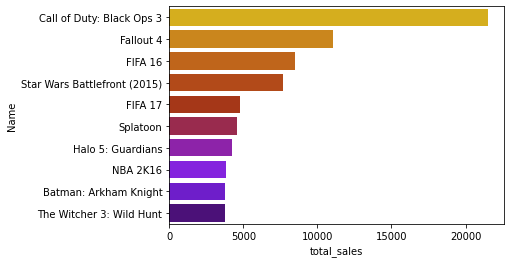

In [157]:
sns.barplot(data=df_top10,x="total_sales",y="Name",palette='gnuplot_r')
# plt.xticks(rotation =90)
plt.xlabel('total_sales')
plt.ylabel('Name')

In [161]:
#미국 top 10
df_na_top10 = df_sales_new_filter.sort_values(['NA_Sales'],ascending=False).head(15)
df_na_top10 = df_na_top10[['Name','NA_Sales']]
df_na_top10 = df_na_top10.groupby('Name').sum().head(10)
df_na_top10 = df_na_top10.sort_values('NA_Sales', ascending=False).reset_index()
df_na_top10

,Name,NA_Sales
0,Call of Duty: Black Ops 3,10290
1,Fallout 4,4920
2,Star Wars Battlefront (2015),4870
3,NBA 2K16,4410
4,Madden NFL 16,4400
5,Halo 5: Guardians,2640
6,Gears of War: Ultimate Edition,2380
7,Uncharted: The Nathan Drake Collection,1960
8,Splatoon,1550
9,Batman: Arkham Knight,1490


Text(0, 0.5, 'Name')

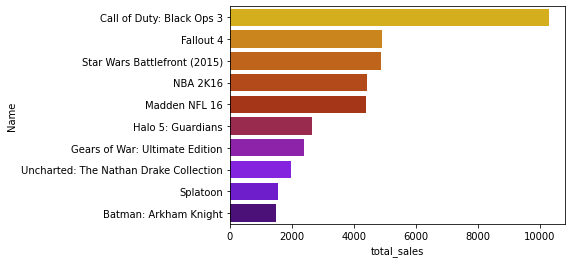

In [162]:
sns.barplot(data=df_na_top10,x="NA_Sales",y="Name",palette='gnuplot_r')
# plt.xticks(rotation =90)
plt.xlabel('total_sales')
plt.ylabel('Name')

In [164]:
#유럽 top 10
df_eu_top10 = df_sales_new_filter.sort_values(['EU_Sales'],ascending=False).head(15)
df_eu_top10 = df_eu_top10[['Name','EU_Sales']]
df_eu_top10 = df_eu_top10.groupby('Name').sum().head(10)
df_eu_top10 = df_eu_top10.sort_values('EU_Sales', ascending=False).reset_index()
df_eu_top10

,Name,EU_Sales
0,FIFA 16,10150
1,Call of Duty: Black Ops 3,7900
2,FIFA 17,3750
3,Star Wars Battlefront (2015),3290
4,Fallout 4,3150
5,The Witcher 3: Wild Hunt,2000
6,Assassin's Creed Syndicate,1920
7,Tom Clancy's The Division,1610
8,Batman: Arkham Knight,1580
9,Need for Speed (2015),1490


Text(0, 0.5, 'Name')

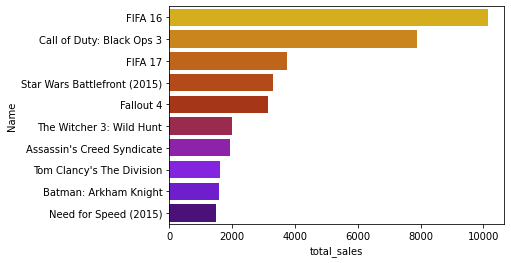

In [165]:
sns.barplot(data=df_eu_top10,x="EU_Sales",y="Name",palette='gnuplot_r')
# plt.xticks(rotation =90)
plt.xlabel('total_sales')
plt.ylabel('Name')

In [171]:
#일본 top 10
df_jp_top10 = df_sales_new_filter.sort_values(['JP_Sales'],ascending=False).head(15)
df_jp_top10 = df_jp_top10[['Name','JP_Sales']]
df_jp_top10 = df_jp_top10.groupby('Name').sum().head(10)
df_jp_top10 = df_jp_top10.sort_values('JP_Sales', ascending=False).reset_index()
df_jp_top10

,Name,JP_Sales
0,Monster Hunter X,2780
1,Splatoon,1440
2,Animal Crossing: Happy Home Designer,1390
3,Fire Emblem Fates,520
4,Metal Gear Solid V: The Phantom Pain,480
5,Call of Duty: Black Ops 3,350
6,Dark Souls III,330
7,Pokemon Super Mystery Dungeon,330
8,Fallout 4,240
9,Mario Party 10,240


Text(0, 0.5, 'Name')

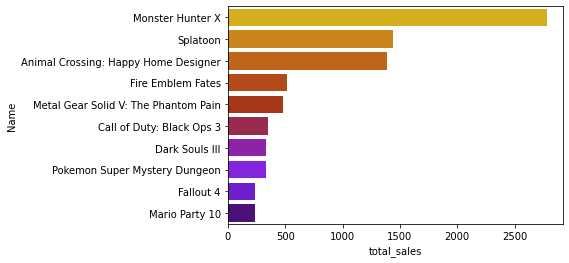

In [172]:
sns.barplot(data=df_jp_top10,x="JP_Sales",y="Name",palette='gnuplot_r')
# plt.xticks(rotation =90)
plt.xlabel('total_sales')
plt.ylabel('Name')

In [267]:
df_oth_top10 = df_sales_new_filter.sort_values(['Other_Sales'],ascending=False).head(15)
df_oth_top10 = df_oth_top10[['Name','Other_Sales']]
df_oth_top10 = df_oth_top10.groupby('Name').sum().head(10)
df_oth_top10 = df_oth_top10.sort_values('Other_Sales', ascending=False).reset_index()
df_oth_top10

,Name,Other_Sales
0,Call of Duty: Black Ops 3,2980
1,FIFA 16,1260
2,Star Wars Battlefront (2015),1230
3,Fallout 4,1100
4,FIFA 17,690
5,NBA 2K16,690
6,Batman: Arkham Knight,610
7,Madden NFL 16,590
8,Assassin's Creed Syndicate,500
9,Metal Gear Solid V: The Phantom Pain,470


Text(0, 0.5, 'Name')

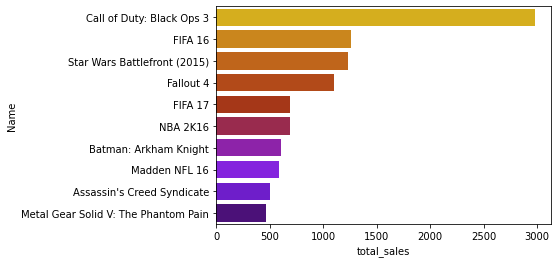

In [268]:
sns.barplot(data=df_oth_top10,x="Other_Sales",y="Name",palette='gnuplot_r')
# plt.xticks(rotation =90)
plt.xlabel('total_sales')
plt.ylabel('Name')

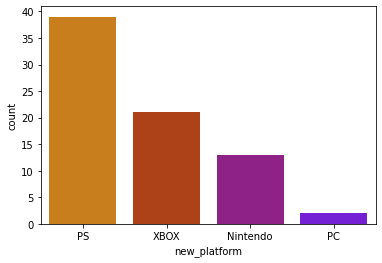

In [169]:
#최근 5년간 출고량이 1M이상인 게임들의 주요 플랫폼
sns.countplot(x='new_platform', data=df_sales_new_filter,palette='gnuplot_r')

PS게임이 압도적으로 많으나 가장 최근 출시된 게임이 닌텐도 DS와 관련된 게임이므로 닌텐도 플랫폼을 주시하여야 한다. -> 최근 동물의숲, 닌텐도 스위치의 등장으로 닌텐도의 향후 전망도 기대해볼만 하다.


In [173]:
dfsn = df_sales_new_filter[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','total_sales']]

In [175]:
#standard
scaler = StandardScaler()
Z = scaler.fit_transform(dfsn)
pca=PCA(2)
pca.fit(Z)
B = pca.transform(Z)

df_pc = pd.DataFrame(B,columns=['pc1','pc2'])
df_pc['new_platform'] = df_sales_new_filter['new_platform']
df_pc

,pc1,pc2,new_platform
0,10.327647,0.713596,PS
1,5.201146,0.081025,PS
2,4.555361,0.212963,PS
3,3.823419,-0.324350,XBOX
4,3.895007,0.240101,PS
...,...,...,...
70,-1.326343,-0.151658,Nintendo
71,-1.253494,-0.487633,PC
72,-1.231797,-0.292805,PS
73,-1.262669,-0.245718,PS


In [176]:
df_pc1 = pd.DataFrame(B,columns=['pc1','pc2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



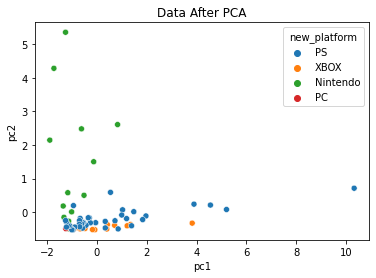

In [177]:
sns.scatterplot(df_pc['pc1'], df_pc['pc2'], hue=df_pc.new_platform)
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()


In [178]:

ch_n = df_sales_new_filter.sort_values('NA_Sales',ascending=False)[:3]
ch_n = ch_n[['Genre','NA_Sales']]
ch1_n = df_sales_new_filter.sort_values('EU_Sales',ascending=False)[:3]
ch1_n = ch1_n[['Genre','EU_Sales']]
ch2_n = df_sales_new_filter.sort_values('JP_Sales',ascending=False)[:3]
ch2_n = ch2_n[['Genre','JP_Sales']]
ch3_n = df_sales_new_filter.sort_values('Other_Sales',ascending=False)[:3]
ch3_n = ch3_n[['Genre','Other_Sales']]
chart2 = pd.concat([ch_n,ch1_n,ch2_n,ch3_n],ignore_index=True)
chart2 = pd.melt(chart2, id_vars=['Genre'],value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']).dropna()
chart2

,Genre,variable,value
0,Shooter,NA_Sales,5770.0
1,Shooter,NA_Sales,4520.0
2,Shooter,NA_Sales,2930.0
15,Sports,EU_Sales,6060.0
16,Shooter,EU_Sales,5810.0
17,Sports,EU_Sales,3750.0
30,Action,JP_Sales,2780.0
31,Action,JP_Sales,2280.0
32,Shooter,JP_Sales,1440.0
45,Shooter,Other_Sales,2310.0


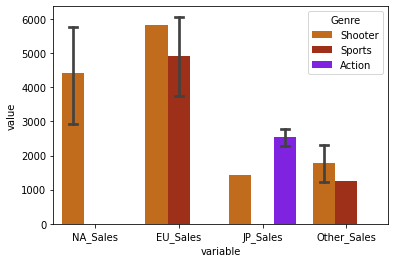

In [179]:
sns.barplot(data=chart2,x='variable', y='value', hue='Genre',capsize=0.1,palette='gnuplot_r')

In [180]:
#국가별 출고량 분포표 -> 어떤 시장 공략이 좋을지
ps_na = pd.DataFrame(df_sales_new_filter['NA_Sales'].groupby(df_sales_new_filter['new_platform']).sum())
gs_na = pd.DataFrame(df_sales_new_filter['NA_Sales'].groupby(df_sales_new_filter['Genre']).sum())

ps_eu = pd.DataFrame(df_sales_new_filter['EU_Sales'].groupby(df_sales_new_filter['new_platform']).sum())
gs_eu = pd.DataFrame(df_sales_new_filter['EU_Sales'].groupby(df_sales_new_filter['Genre']).sum())

ps_jp = pd.DataFrame(df_sales_new_filter['JP_Sales'].groupby(df_sales_new_filter['new_platform']).sum())
gs_jp = pd.DataFrame(df_sales_new_filter['JP_Sales'].groupby(df_sales_new_filter['Genre']).sum())

ps_oth = pd.DataFrame(df_sales_new_filter['Other_Sales'].groupby(df_sales_new_filter['new_platform']).sum())
gs_oth = pd.DataFrame(df_sales_new_filter['Other_Sales'].groupby(df_sales_new_filter['Genre']).sum())

In [181]:
ps1 =  pd.concat([ps_na,ps_eu,ps_jp,ps_oth],axis=1)
ps1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
new_platform,,,,
Nintendo,8100,6170,11930,1530
PC,860,1270,0,180
PS,40440,54720,3880,18510
XBOX,28410,16210,130,4420


In [182]:
ps = pd.concat([ps_na,ps_eu,ps_jp,ps_oth],axis=1).reset_index()
ps

,new_platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,8100,6170,11930,1530
1,PC,860,1270,0,180
2,PS,40440,54720,3880,18510
3,XBOX,28410,16210,130,4420


In [183]:
label = ps['new_platform']
label

0    Nintendo
1          PC
2          PS
3        XBOX
Name: new_platform, dtype: object

In [184]:
ps1 = ps.melt(id_vars='new_platform',value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
ps1

,new_platform,variable,value
0,Nintendo,NA_Sales,8100
1,PC,NA_Sales,860
2,PS,NA_Sales,40440
3,XBOX,NA_Sales,28410
4,Nintendo,EU_Sales,6170
5,PC,EU_Sales,1270
6,PS,EU_Sales,54720
7,XBOX,EU_Sales,16210
8,Nintendo,JP_Sales,11930
9,PC,JP_Sales,0


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

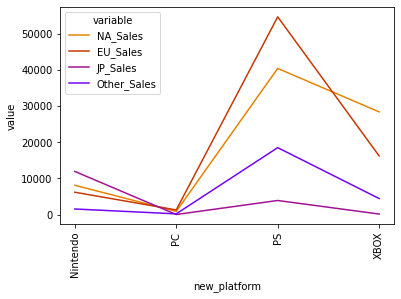

In [185]:
sns.lineplot(data=ps1, x='new_platform',y='value',hue='variable',palette='gnuplot_r')
plt.xticks(rotation =90)

In [186]:
gs_pca =pd.concat([gs_na,gs_eu,gs_jp,gs_oth],axis=1)

In [187]:
gs = pd.concat([gs_na,gs_eu,gs_jp,gs_oth],axis=1).reset_index()
gs

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,11650,13420,7990,4230
1,Adventure,970,1530,70,350
2,Fighting,3160,1860,220,910
3,Misc,1210,1090,240,210
4,Platform,2110,1980,1080,480
5,Racing,1350,3070,100,650
6,Role-Playing,10220,9640,1640,3030
7,Shooter,32310,26620,3010,9410
8,Simulation,470,1000,1390,120
9,Sports,14360,18160,200,5250


In [ ]:
gs1 = gs.melt(id_vars='Genre',value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
gs1

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

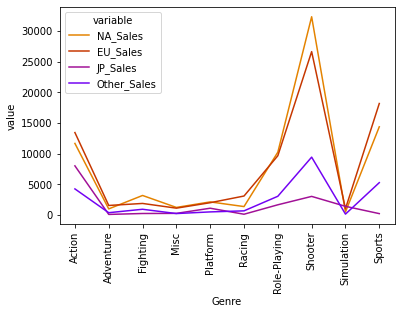

In [189]:
sns.lineplot(data=gs1, x='Genre',y='value',hue='variable',palette='gnuplot_r')
plt.xticks(rotation =90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

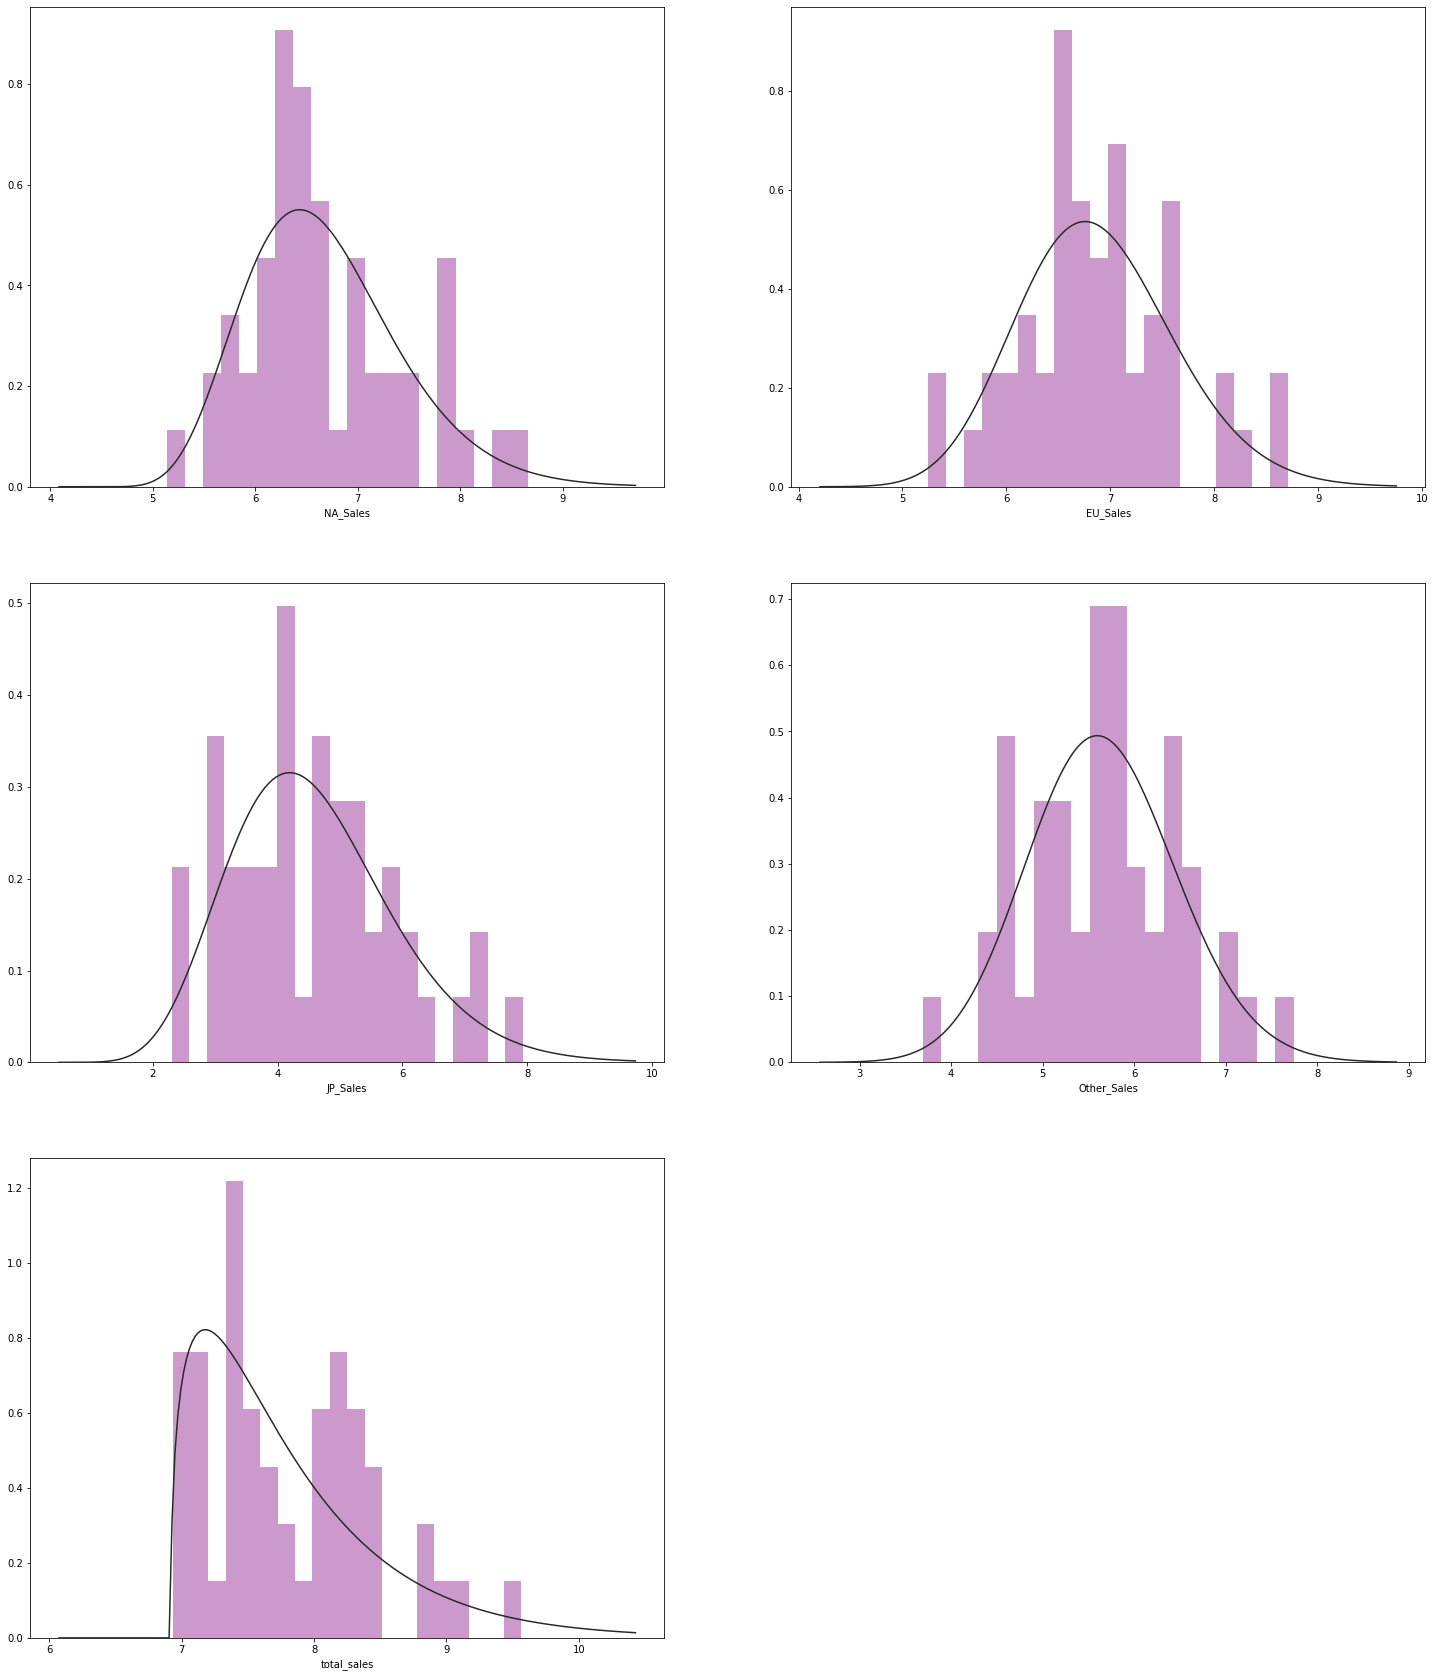

In [287]:
data_reg = df_sales_new_filter.copy()

data_reg = data_reg[data_reg.NA_Sales != 0]
data_reg = data_reg[data_reg.EU_Sales != 0]
data_reg = data_reg[data_reg.Other_Sales != 0]
data_reg = data_reg[data_reg.JP_Sales != 0]
data_reg = data_reg[data_reg.total_sales != 0]

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'total_sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_reg[column]), bins=20, kde=False, fit=stats.gamma, color='purple');

In [191]:
#PCA 어디에?
#clustering 어떻게?